<font size="5"><b>Final Project Report Group 42- Heart Failure Fatality</b></font>

**Introduction**
    
Cardiovascular diseases kill approximately 17 million people in the world, including heart attacks, strokes, and heart failure. In particular, heart failure is caused when the heart cannot successfully send the required amount of blood to the body (Chicco, 2020), and can occur for numerous reasons such as diabetes, high blood pressure, and other heart conditions or diseases. With the emergence and accessibility of electronic health records, it is now possible to use data from patients who have experienced heart failure and find trends and patterns amongst variables that could be possible predictors for people who are at risk of heart failure. Due to the vital nature of the heart, finding trends among variables as predictors of heart failure has become a priority among doctors and researchers alike. Our project was to take a data set comprised of data taken from people who had suffered from heart failure and build a classifying model that could predict a person's chance of survival after heart failure. A data set collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad contains the data of 299 patients which consisted of 105 women and 194 men who had all experienced heart failure. The dataset contained 13 features which ranged from physical, clinical, and lifestyle characteristics. This included categorical variables like sex, diabetes, and smoking; as well as numerical variables such as platelet count, serum creatine levels, and ejection fraction. This data set also contained the information on if the patient had died within 130 days of their heart failure, referred to as a death event. Through the use of forward selection, we were able to identify two variables that were strong predictors of death events. These two variables, serum creatine and ejection fraction were used to build our classifying model that would take in the values of our predictors and classify whether this patient would experience a death event or not following 130 days after heart failure. This classifier would allow us to answer the question of, if given a person's serum creatine levels and ejection fraction will that person survive within 130 days after their heart failure?


**Methods and Results**

In [1]:
# Loading necessary packages
library(tidyverse)
library(tidymodels)
library(repr)

# Setting the seed to ensure reproducability 
set.seed(42)

# Setting the number of maximum rows which will be displayed whenever a data tibble needs to be outputed 
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Firstly, appropriate packages were added to the file to use their inbuilt functions. A seed was set to ensure reproducibility so that the random values are always the same. And the maximum rows to be displayed when a tibble needs to be outputted was set to 6. 

In [2]:
#reads in data as well as turns relevant double columns into factors 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# tranforms the data variables which need to factors into the factor datatype 
heart_data <- read_csv(url)%>%
    mutate(sex = as_factor(sex))%>%
    mutate(smoking = as_factor(smoking))%>%
    mutate(DEATH_EVENT = as_factor(DEATH_EVENT))%>%
    mutate(high_blood_pressure = as_factor(high_blood_pressure))%>%
    mutate(diabetes = as_factor(diabetes))%>%
    mutate(anaemia= as_factor(anaemia)) 


#creates factor levels for columns that make sense with column name, not just 0 and 1 
levels(heart_data$sex) <- c("female","male")
levels(heart_data$smoking) <- c("no","yes")
levels(heart_data$DEATH_EVENT) <- c("died","survived")
levels(heart_data$high_blood_pressure) <- c("no","yes")
levels(heart_data$diabetes) <- c("no","yes")
levels(heart_data$anaemia) <- c("no","yes")

Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



Then, the dataset was read as csv file. All the catagorical variables were transformed into factors datatype by using mutate function and as_factor function. Then, their factor levels were set to understandable values rather than just 0 and 1. 

In [3]:
#splits the data into training and testing data 
heart_data_split <- initial_split(heart_data, prop = .75, strata = DEATH_EVENT)
heart_train <- training(heart_data_split)
heart_test <- testing(heart_data_split)
 
heart_train

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,survived
50,yes,111,no,20,no,210000,1.9,137,male,no,7,survived
90,yes,47,no,40,yes,204000,2.1,132,male,yes,8,survived
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,no,1820,no,38,no,270000,1.2,139,female,no,271,died
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,died
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,died


Table 1: Table containing training data that our model will be trained with

Here, the dataset was split into training data and testing data for classification. The training data consist of 75% of all rows randomly chosen from the dataset with initial_split function. This function shuffles the data so no particular order/pattern is present in the 2 sets, and also stratifies the data so both sets have the same proportion of positive and negative classes. This makes the 2 sets comparable. The proportion 75% was chosen to use the vast majority of data for training while keeping sufficient number of observations for testing, regarding that our dataset only has 299 observations. This helps our model to be trained on the majority of the data hence being more accurate, while giving us sufficient data to evaluate its accuracy as well. This is one of the splits suggested in the course book as well (refer to the end of the notebook for reference). 

In [4]:
# remove non essential columns from the dataset and only keep numerical to run forward propagation
heart_train <- heart_train %>% 
    select(-anaemia, -diabetes, -high_blood_pressure, -sex, -smoking, -time)

Next, due to medical significance (Chicco, 2020), we decided that we will use "DEATH_EVENT" as our output variable which we will try to classify, hence we removed all the other categorical datatypes from the heart_test dataset using the select function. 

In [5]:
# CODE TO SELECT THE BEST PREDICTOR VARIABLES (code has been adapted from the DSCI 100 course book.) 
# (Citation is in references section)

# Evaluating which predictive variables to choose

# creating an object of names of all predictive variables called "names"
names <- colnames(heart_train %>% select(-DEATH_EVENT))

# creating an empty tibble to store the final results
accuracies <- tibble(size = integer(), 
                     model_string = character(), # this is the first argument to the "recipe" function
                     accuracy = numeric())

# creating a model specification for the classifier
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
     set_engine("kknn") %>% 
     set_mode("classification")

# creating a dataframe of all candidate k values 
k_vals <- tibble(neighbors = seq(1:15))

# creating a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_train, v = 5, strata = DEATH_EVENT)

# storing the total number of predictors in object "n_total"
n_total <- length(names)

# stores the selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("DEATH_EVENT", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_train) %>% 
                          step_scale(all_predictors()) %>% 
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>% 
              add_recipe(heart_recipe) %>% 
              add_model(heart_spec) %>% 
              tune_grid(resamples = heart_vfold, grid = k_vals) %>% 
              collect_metrics() %>% 
              filter(.metric == "accuracy") %>% 
              summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

# Working: 
# A k-nn classifier is built for each set of predictors, 
# its best k value (from k = 1 to 15) and its appropriate accuracy is calculated with 5-v fold cross validation. 
# This was achievable primarily due to the “paste” function which helped 
# form a model specification for each set of predictor by concatinating them seperated with the “+” signs. 
# Moreover, two for loops were used to achieve this: the first one to account for the increasing predictor set sizes, 
# and the second one to analyse which predictor to add to each cycle/iteration. An important 
# factor which made us select this algorithm for our predictor variable selection was computational cost. 

size,model_string,accuracy
<int>,<chr>,<dbl>
1,DEATH_EVENT ~ ejection_fraction,0.7190953
2,DEATH_EVENT ~ ejection_fraction+serum_creatinine,0.7950812
3,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium,0.7994247
4,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+creatinine_phosphokinase,0.7778876
5,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+creatinine_phosphokinase+age,0.7818357
6,DEATH_EVENT ~ ejection_fraction+serum_creatinine+serum_sodium+creatinine_phosphokinase+age+platelets,0.7511111


Table 2: Table containg results from forward propagation in ascending order of number of variables used 

Method (forward propagation): This code block ran a predictor variable selection algorithm called "forward propagation". This algorithm essentially “propagates” through all the variables, concatenating singular predictor variables after each other for every iteration of the loop. The subset of variables that return the higher values of accuracies is the ones which are appropriate for the classification. There are many other (more productive) algorithms present for this task such as best subset selection, however, most of them take much longer to run while not giving any significant difference in the overall accuracy of the classification. 

Result (forward propagation): The result of this evaluation showed that the top 2 accuracies are the second and the third rows. The accuracy predicted with ejection_fraction and serum_creatinine was 79.51% and that predicted with ejection_fraction, serum_creatinine, and serum_sodium was 79.94%. However, biologically, ejection fraction and serum creatinine alone are the best predictors of death events due to medical significance (Chicco, 2020). This does not differ from our evaluation as the accuracy of prediction with ejection_fraction and serum_creatinine is the second-highest. Therefore, these two numerical variables were chosen as predictive variables for our classification.

In [6]:
# selecting only appropriate columns from training set and testing set (ejection_fraction, serum_creatinine, DEATH_EVENT)
heart_train <- heart_train %>% 
    select(ejection_fraction, serum_creatinine, DEATH_EVENT)

heart_test<- heart_test%>%
    select(ejection_fraction, serum_creatinine, DEATH_EVENT)

Now that we have selected our predictor variables, we plot the initial graph to look at their effect on death event and how they relate to the final output class. 

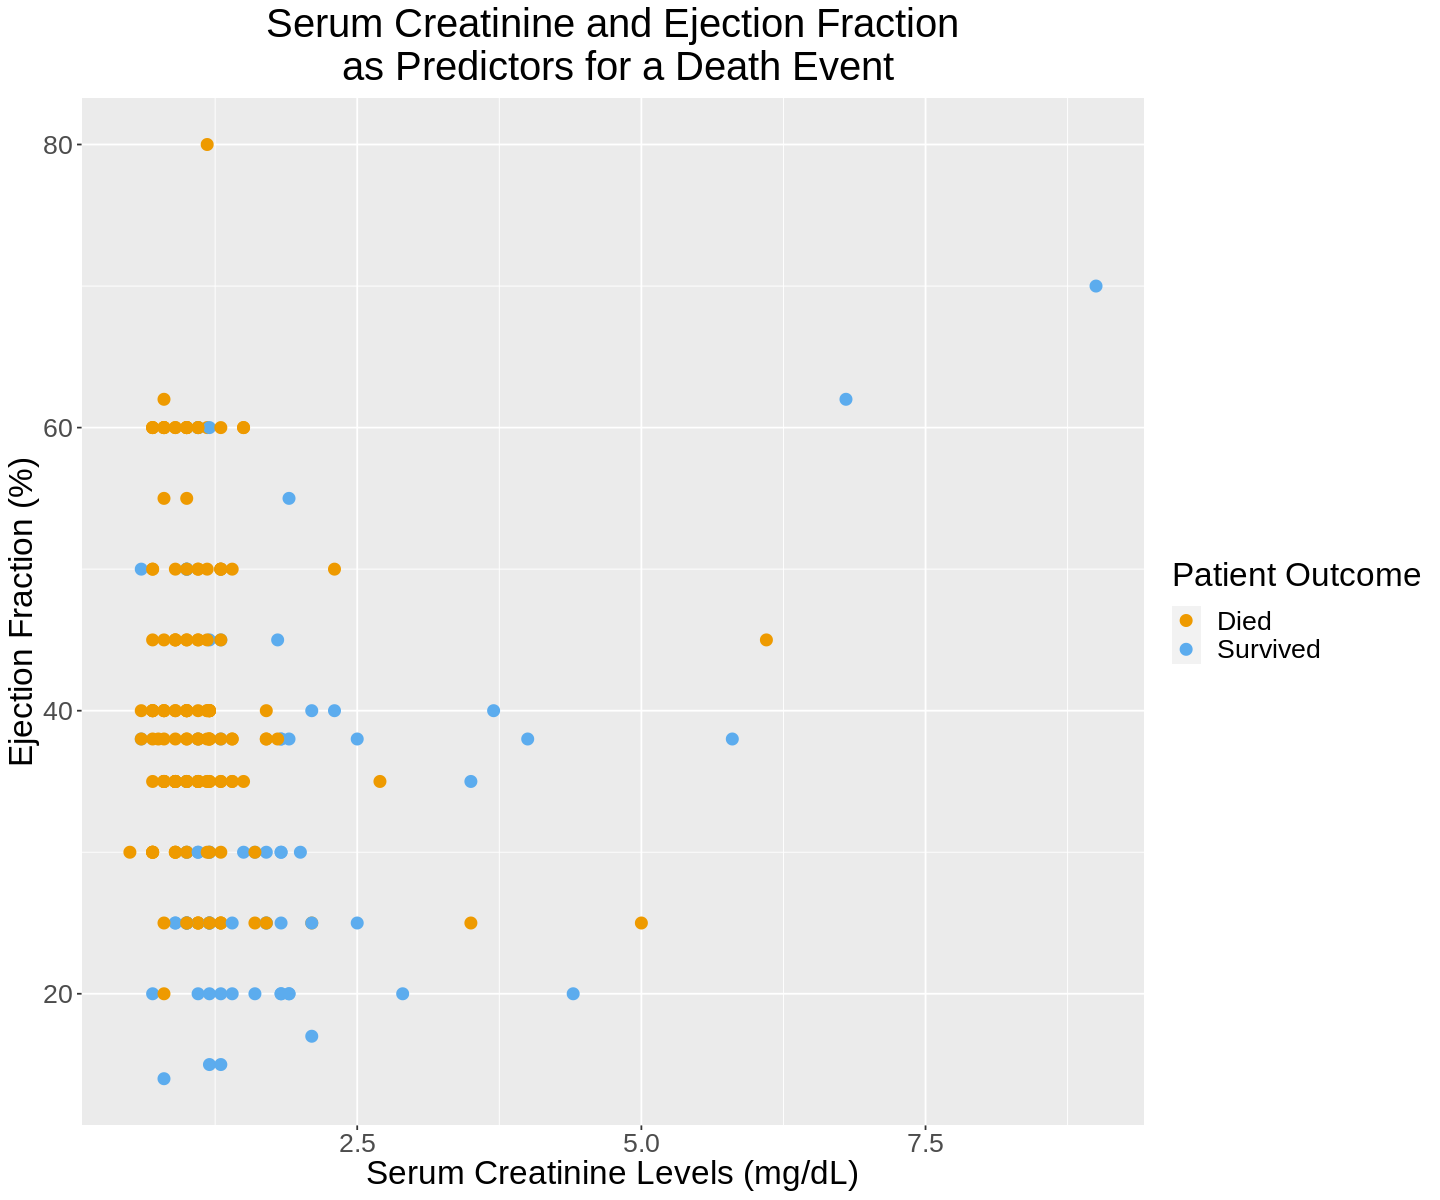

In [7]:
options(repr.plot.height = 10, repr.plot.width = 12)

# Plotting the initial graph for our variables for exploratory data analysis
heart_plot<- heart_train%>%
    ggplot(aes(x= serum_creatinine, y = ejection_fraction))+
    geom_point(aes(color = DEATH_EVENT), size = 3)+
    labs(x = "Serum Creatinine Levels (mg/dL)", y = "Ejection Fraction (%)", 
         title = "Serum Creatinine and Ejection Fraction\n as Predictors for a Death Event",
         color = "Patient Outcome")+
    theme(text = element_text(size = 20), plot.title = element_text(hjust = .5)) + 
    scale_color_manual(labels = c("Died", "Survived"), 
                     values = c("orange2", "steelblue2"))
heart_plot

Figure 1: Scatter plot containg our chosen predictor variables with points color based on the outcome for the patient (died/survived)

We plotted this for our initial exploration. We set the size of the plot and text to be easily readable while we also used color-blind-friendly colors for our classification shading. The plot above shows the distribution of our two predictors in relation to our variable that we are trying to predict, death event (in this graph it is labeled as patient outcome, but that is the same as death event). We can easily notice that the major cluster of death outcomes is in the region where ejection fractions are between 25% - 60% and when logarithmic serum creatinine is between 0.3 - 2. Hence a clear decision boundary can be formulated which will be done in further analysis. 

In [8]:
# Making our classifier and using the variables found from forward propagation to find the best k value

# Creating variable k_vals which stores the candidate k values in form of a tibble
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

# Creating a recipe with recipe function, class = DEATH_EVENT and predictive variables are ejection_fraction
# and serum_creatinine. Only heart_train data is used with both the predictive variables scaled. 
final_recipe <- recipe(DEATH_EVENT ~ ejection_fraction+serum_creatinine, data = heart_train) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors())

# Creating a model specification for k-nn classification: argument for "neighbors" is set to tune() to 
# get best k value for the classification
# "rectangular" input into the weight_func argument was to give each neighbour only 1 voting power
kmin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

# Creating a 5 v fold cross validation argument with strata = DEATH_EVENT as that is the variable we want to predict
final_vfold <- vfold_cv(heart_train, v = 5, strata = DEATH_EVENT)

# Putting everything in a workflow, using tune_grid to repeat on all candidate k value with cross validation 
# and collect_metrics to calculate the accuracy for each run
kmin_results <- workflow() %>%
    add_recipe(final_recipe) %>% 
    add_model(kmin_spec) %>% 
    tune_grid(resamples = final_vfold, grid = k_vals) %>% 
    collect_metrics()

After predictive variables were chosen, the KNN classifier was created with those variables in order to choose the best k value. As 5-fold cross-validation would be performed here as well, the neighbors argument was "tune()". We used 5-fold cross validation as with our data size, it is sufficient to help us avoid any "lucky" subsets which might influence the accuracy while being computationally efficient. Similarly, the k values were chosen from 1 to 15 to make our code computationally light while giving us a broad enough range for our data set size of 299 data points. The results for calculating accuracy for each run were then calculated as follows to get the best k value which returns the highest approximate accuracy: 

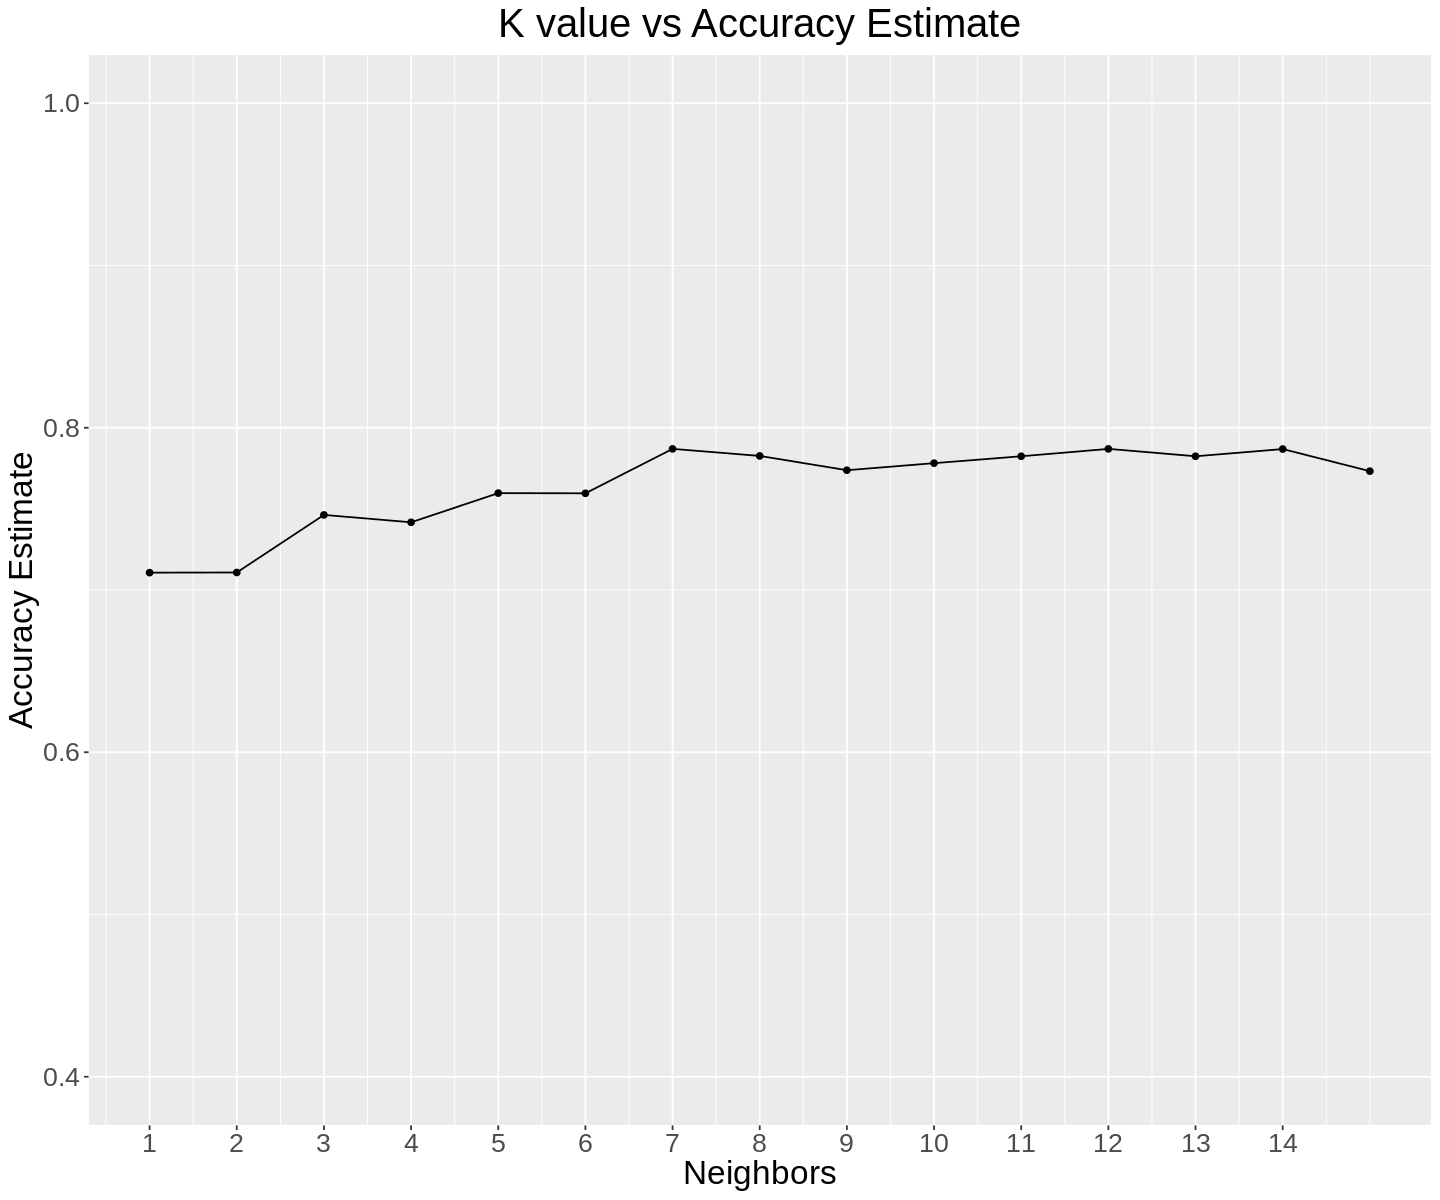

In [9]:
# Extracting only accuracy values from kminresults using filter function
final_accuracies <- kmin_results %>% 
    filter(.metric == "accuracy")

# Plotting a neighbors vs accuracy mean graph to see which k is the best
accuracy_versus_k <- ggplot(final_accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "K value vs Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis  
      theme(text = element_text(size = 20), plot.title = element_text(hjust = .5))
accuracy_versus_k

Figure 2: Line plot showing the Accuracy Estimate of our model in relation to the amount of k neighbors our model was trained with

We then plotted a graph for the mean accuracy which was received after collecting the metrics for every k value. From figure 2 we can see a slight increase in accuracy to k = 7 and then plateau with notable bumps in accuracy around k = 12 and 14.

In [10]:
# Extracting the k value which offers the maximum accuracy from kmin_results
k_min <- kmin_results %>% 
    filter(.metric == "accuracy") %>% 
    arrange(-mean) %>% 
    slice(1) %>% 
    select(neighbors, mean) %>% 
    rename(accuracy = mean)
k_min

neighbors,accuracy
<dbl>,<dbl>
7,0.7869829


Table 3: Table showing the neighbor with the highest accuracy

Creating a table of k values in descending order of accuracy shows us that k = 7 gives us the highest accuracy at 78.7%. 

In [11]:
# Retraining with the chosen K value of 7

# Creating the final model specification with the best k value set as the argument for neighbors (7)
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

# Putting the final model specification and recipe into a wokflow and fitting it to heart_train 
final_fit  <- workflow() %>%
    add_recipe(final_recipe) %>% 
    add_model(final_spec) %>% 
    fit(data = heart_train)

# predicting the classes of heart test 
heart_prediction <- predict(final_fit, heart_test) %>% 
    bind_cols(heart_test)

# Evaluating the accuracy of prediction made on heart test
heart_prediction_accuracy <- heart_prediction %>% 
    metrics(truth = DEATH_EVENT, estimate = .pred_class) %>% 
    filter(.metric == "accuracy")%>%
    pull(.estimate)
heart_prediction_accuracy

[1] 0.7027027

We calculate the test accuracy by retraining a new classifier on heart_train with the best k value, in this case, k = 7. The specification was fitted onto the training data and then the predict function was used to predict the classification of DEATH_EVENT for the testing data. These predicted classifications were then compared to the actual classes to calculate the test accuracy using the metrics function. We found our model to accurately predict 70.3% of DEATH_EVENTS in the test dataset.

In [12]:
heart_prediction_confusion <- heart_prediction %>% 
    conf_mat(truth = DEATH_EVENT, estimate = .pred_class)
heart_prediction_confusion

          Truth
Prediction died survived
  died       39       11
  survived   11       13

From this confusion matrix, we can see that our model misclassified 11 people who survived but were predicted to have died. Despite this being a misclassification that lowers our overall accuracy; in a real-life hospital setting we are much more concerned about when our model predicted someone's survival, but they died. If we just look at those "critical" misclassifications our model accuracy goes up to (39+13+11)/(39+11+11+13) ≈ 86.5%

Now we build a majority classifier (one which predicts died always) to see how well our classifier works against the majority. 

In [13]:
#added a reference point using a majority classifier if it predicted died everytime it would have 68% accuracy.
heart_data_proportions <- heart_train %>%
                      group_by(DEATH_EVENT) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(heart_train))

heart_data_proportions

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percent
<fct>,<int>,<dbl>
died,153,68
survived,72,32


The majority classifier seems to be outputting an accuracy of 68%, which is quite close to our actual testing accuracy. This suggests that the classification classifier which we created is not that strong. This will further be discussed in the discussion section. 

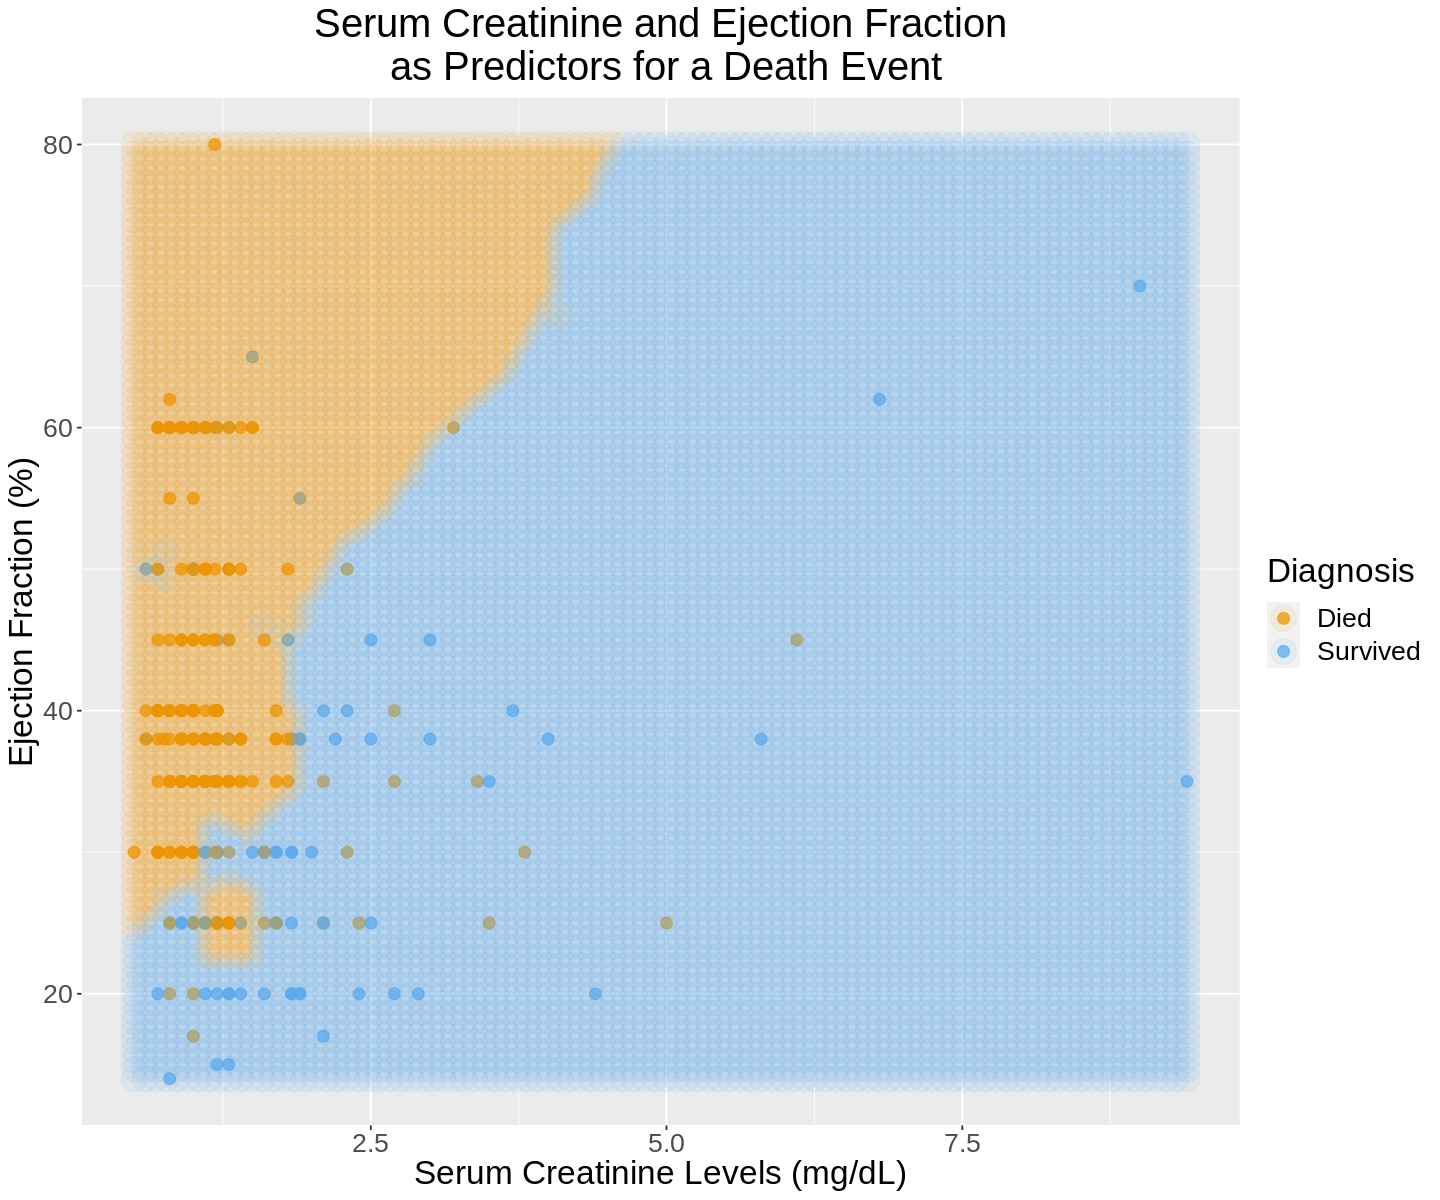

In [14]:
# Making a prediction boundry plot for the classifier 
options(repr.plot.height = 10, repr.plot.width = 12)

#scaling all the data before plotting it
graph_data <- heart_data

# recipe(DEATH_EVENT ~ ejection_fraction + serum_creatinine, data = heart_data)%>%
#     step_scale(all_predictors())%>%
#     step_center(all_predictors())%>%
#     prep()%>%
#     bake(heart_data)


# create the grid of area/smoothness vals, and arrange in a data frame
ef_grid <- seq(min(graph_data$ejection_fraction), 
                max(graph_data$ejection_fraction), 
                length.out = 100)
sc_grid <- seq(min(graph_data$serum_creatinine), 
                max(graph_data$serum_creatinine), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(ejection_fraction = ef_grid, 
                                serum_creatinine = sc_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(final_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>% 
  rename(DEATH_EVENT = .pred_class)

# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
heart_prediction_plot <- ggplot() +
  geom_point(data = graph_data, 
             mapping = aes(x = serum_creatinine, 
                           y = ejection_fraction, 
                           color = DEATH_EVENT), 
             alpha = 0.75, 
             size = 3) +
  geom_point(data = prediction_table, 
             mapping = aes(x = serum_creatinine, 
                           y = ejection_fraction, 
                           color = DEATH_EVENT), 
             alpha = 0.09, 
             size = 7) +
  labs(color = "Diagnosis", x = "Serum Creatinine Levels (mg/dL)", y = "Ejection Fraction (%)", 
         title = "Serum Creatinine and Ejection Fraction\n as Predictors for a Death Event") +
  scale_color_manual(labels = c("Died", "Survived"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 20), plot.title = element_text(hjust = .5))

heart_prediction_plot

This plot essentially summarizes the results of our classifier. We have created a decision boundary plot to see which patients die and which survive depending our serum creatinine levels and ejection fraction. The actual points are the points from a scatter plot of Ejection fraction (%) versus Serum Creatinine levels (mg/dL) as predictors for a death event. Orange colour indicates people died and blue colour indicates survived. We had to follow a complicated method to achieve this (which was inspired by the DSCI 100 book). First, we created the grid of random creatinine/ejection values, and arrange it in a data frame using the as.grid function. Then we used the predict function to make predictions at the grid points. We used expand.grid function to predict the label of each, and visualize the predictions with a coloured scatter. Each point for this "fake" grid was given a high radius value and low transparency so it looks like the graph is actually shaded. Finally, we overlay this plot with a plot of the actual data points from our heart_data dataset to see if the decision boundary aligns with the actual data. Hence our final result is a plot containing (1) the coloured scatter of the original data and (2) the faded coloured scatter for the grid points.

As we can clearly see, the decision boundary aligns with the decision boundary which one would have intuitively created and is covering most of the data points correctly, hence the classifier seems to be working properly. 


**Discussion**


To create a model from our given data set we found that our best predictors of Death Events were serum creatine levels and ejection fraction.  Serum creatine is a waste product generated by creatine when muscle breakdowns(Chicco, 2020). Serum creatine is normally removed from the bloodstream via the kidneys but high levels of serum creatine may be an indication of renal dysfunction (Cole et al., 2012).  Renal dysfunction is a common comorbidity with acute and chronic heart failure however the complex interactions between the two are still poorly understood in the scientific community (Cole et al., 2012).  The Ejection Fraction is the proportion of blood pumped out through one contraction of the heart and in this data set is given as a percentage (Chicco, 2020).  While these predictors by themselves each have their own impact and connection to heart failure it was unclear what patterns and trends they would have when used together to predict a Death Event. We began by assembling a model using these two variables as predictors. Through the use of cross validation and tune_grid() function we found a range of k values from 1 to 15 and their corresponding accuracies. From Figure 2 we can see a gentle increase with a peak and plateau of accuracy occurring at k = 7.  While we could have chosen a smaller k value to save on computation time and maintain a similar accuracy, we decided to choose the k with the highest accuracy due to our model being responsible for predicting life and death of patients.  After running our model with k = 7 we found that our model had an accuracy of 70.3%. When creating a confusion matrix it showed that our model had predicted 11 deaths as a classification for patients that had actually survived. Even though our model had incorrectly classified these observations we decided to include them as an accurate prediction, since in a hospital setting this patient would still have survived. The more “critical” misclassifications, where our model predicted someone's survival when they died, added up to 11. If we counted only these “critical” classifications as misclassifications it brought our total accuracy up to 86.5%. Our majority classifier which predicted the death of the patient every time had an accuracy of 68%. When we compare our model on a pure classification accuracy base it did not perform well. 70.3% is not acceptable when that means that potentially 30% of the cases will be misclassified which could result in numerous patients deaths. This is also only slightly higher than our majority classification of 68% meaning that our model is barely outperforming a model that takes in zero input data. If we focus on only the critical misclassifications then our classifier would have predicted only 86.5% of deaths. While this is an improvement, this percentage still seems too low given the nature and importance of what this model is predicting. With 13.5% of cases misclassified as survival when the patient died, it would be difficult for doctors and researchers to trust, and thus it would be hard to allocate their resources properly towards those patients at risk. The low accuracy of our model is perhaps not surprising given the vastly different biological roles our two predictors are involved with. Serum creatinine being related to renal dysfunction and ejection fraction being the heart's ability to pump blood do not appear to be related at all on the surface. While there are possible connections between renal dysfunction and heart failure, it seemed unlikely that those two predictors would be able to accurately predict a patient's chance of survival post heart failure. It is also possible that there is a trend, however, we are limited by our smaller dataset. In the future, we may want to replicate our model with a larger data set giving it more data to train and test with. This findings further complicate the potential connections that can be drawn between kidney failure and heart failure. In order to better understand these connections, future studies may want to investigate other common indicators of kidney failure and heart failure and discover if any patterns or trends lie between them as predictors of survival.


**References**


Cole, R. T.; Masoumi, A.; Triposkiadis, F.; Giamouzis, G.; Georgiopoulou, V.; Kalogeropoulos, A.; 
Butler, J. Renal Dysfunction in Heart Failure. Medical Clinics of North America 2012, 96 (5), 955–974.
UCI Machine Learning Repository: Heart Failure Clinical Records Data Set. (n.d.). Retrieved 
March 5, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records 

Tiffany Timbers, T. C. (2022, March 2). Data science. Chapter 6 Classification II: evaluation and 
tuning. Retrieved March 5, 2022, from https://datasciencebook.ca/classification2.html

Chicco, D., &amp; Jurman, G. (2020, February 3). Machine learning can predict survival of 

